# Alberto J. Orio García

## Prueba de Conocimientos Ciencia de Datos 01

En este notebook puedes utilizar todas las librerias con las que hemos trabajado.

In [1]:
import requests 

from bs4 import BeautifulSoup

from selenium import webdriver

from time import sleep

import helium

import pandas as pd
import numpy as np

### Ejercicio 1:

_**url** = https://www.20minutos.es/_

Vamos a hacer Web Scraping de las primeras 3 paginas de las categorias de noticias: **Ciencia**, **Deporte**, **Gente**, **Economía**, **Madrid** y **Opinión**.

Y de cada noticia/articulo vamos a obtener:

- **Titulo**
- **Hora**
- **Fecha**
- **Autor**
- **Texto completo**
- **Categoria (columna objetivo)**

**Sustituir con NaN's en el caso de que no se pueda extraer alguno de esos datos anteriores.**

Genera un DataFrame con esta información y guardalo en el archivo **`20minutos_1.csv`**.

In [8]:
# Driver de Chrome.
chrome_driver = "chromedriver.exe"

In [9]:
browser = webdriver.Chrome(executable_path = chrome_driver) # Abre el navegador.

browser.get("https://www.20minutos.es/") # Entra en 20minutos.

browser.maximize_window() # Maximiza la ventana del navegador.

In [10]:
# Para aceptar las cookies.
browser.find_element_by_id("didomi-notice-agree-button").click()
sleep(3)

In [5]:
# Para acceder a categorías. 
browser.find_element_by_css_selector("#ui-header-land > div.section-menu > nav > ul > li.primary-more.link.current.no-expandable.last").click()
sleep(3)

In [6]:
# Para entrar en la categoría "Ciencia".
browser.find_element_by_link_text("Ciencia").click()
sleep(3)

In [7]:
# Para Extraer el html y pasarlo a objeto bs4.
soup = BeautifulSoup(browser.page_source, "html.parser")

In [8]:
# Función para obtener una lista de enlaces.
def noticiasCategoria(url_original, categoría, número_páginas):
    lista_urls = []
    
    # Para recorrer las páginas.
    for i in range(1, número_páginas + 1):
        
        url = f"{url_original}{categoría}/{i}/"
        print(url)
        
        # EL response con Helium.
        browser = helium.start_chrome(url, headless = True)
        sleep(5)
        
        soup = BeautifulSoup(browser.page_source, "html.parser")
        
        # Para recorrer las noticias.
        for bs in soup.find_all("div", class_ = "media-content"):

            # De esta forma se accede al enlace.
            enlace = bs.find("a")["href"]

            # Para incluir en la lista, solo cuando el enlace incluye el string "noticia", o la categoría se encuentre en 
            # el enlace, además de no tener el string "imagenes".
            if (("noticia" in enlace) or (categoría in enlace)) and ("/imagenes/" not in enlace):
                lista_urls.append(enlace)
    
    return lista_urls

In [9]:
# Con esto, se extraen las noticias de las 3 primeras páginas, y con el len del final, se comprueba su número.
resultado = noticiasCategoria("https://www.20minutos.es/", "ciencia", 3)
len(resultado)

https://www.20minutos.es/ciencia/1/
https://www.20minutos.es/ciencia/2/
https://www.20minutos.es/ciencia/3/


88

In [10]:
%%time

# Con este código, lo mismo de antes, pero para todas las categorías que pide el ejercicio.

categorias = ["ciencia", "deportes", "gente", "economia", "madrid", "opinion"]

dict_enlaces = {}

numero_paginas = 3

for categoria in categorias:
    
    dict_enlaces[categoria] = noticiasCategoria("https://www.20minutos.es/", categoria, numero_paginas)

https://www.20minutos.es/ciencia/1/
https://www.20minutos.es/ciencia/2/
https://www.20minutos.es/ciencia/3/
https://www.20minutos.es/deportes/1/
https://www.20minutos.es/deportes/2/
https://www.20minutos.es/deportes/3/
https://www.20minutos.es/gente/1/
https://www.20minutos.es/gente/2/
https://www.20minutos.es/gente/3/
https://www.20minutos.es/economia/1/
https://www.20minutos.es/economia/2/
https://www.20minutos.es/economia/3/
https://www.20minutos.es/madrid/1/
https://www.20minutos.es/madrid/2/
https://www.20minutos.es/madrid/3/
https://www.20minutos.es/opinion/1/
https://www.20minutos.es/opinion/2/
https://www.20minutos.es/opinion/3/
Wall time: 4min 53s


In [16]:
# Para guardar la información extraida en forma de DataFrame.
df = pd.DataFrame(dict_enlaces.items(), columns = ["Categoría", "Enlace"])
df

,Categoría,Enlace
0,ciencia,[https://www.20minutos.es/noticia/4978880/0/qu...
1,deportes,[https://www.20minutos.es/deportes/noticia/497...
2,gente,[https://www.20minutos.es/noticia/4978917/0/mu...
3,economia,[https://www.20minutos.es/noticia/4978961/0/la...
4,madrid,[https://www.20minutos.es/noticia/4978651/0/el...
5,opinion,[https://www.20minutos.es/opinion/helena-resan...


In [18]:
# Para utilizar como índice la columna Enlace.
df = df.explode("Enlace").reset_index(drop = True)
df

,Categoría,Enlace
0,ciencia,https://www.20minutos.es/noticia/4978880/0/que...
1,ciencia,https://www.20minutos.es/noticia/4978811/0/eae...
2,ciencia,https://www.20minutos.es/noticia/4978683/0/la-...
3,ciencia,https://www.20minutos.es/noticia/4978283/0/los...
4,ciencia,https://www.20minutos.es/noticia/4978185/0/un-...
...,...,...
521,opinion,https://www.20minutos.es/opinion/el-meme-mas-r...
522,opinion,https://www.20minutos.es/opinion/isabel-serran...
523,opinion,https://www.20minutos.es/opinion/belen-molleda...
524,opinion,https://www.20minutos.es/opinion/mario-garces-...


In [19]:
# Para guardar en un archivo csv.
df.to_csv("urls_ejercicio1_parte1.csv", index = False, sep = ",")

In [2]:
df = pd.read_csv("urls_ejercicio1_parte1.csv")

df

,Categoría,Enlace
0,ciencia,https://www.20minutos.es/noticia/4978880/0/que...
1,ciencia,https://www.20minutos.es/noticia/4978811/0/eae...
2,ciencia,https://www.20minutos.es/noticia/4978683/0/la-...
3,ciencia,https://www.20minutos.es/noticia/4978283/0/los...
4,ciencia,https://www.20minutos.es/noticia/4978185/0/un-...
...,...,...
521,opinion,https://www.20minutos.es/opinion/el-meme-mas-r...
522,opinion,https://www.20minutos.es/opinion/isabel-serran...
523,opinion,https://www.20minutos.es/opinion/belen-molleda...
524,opinion,https://www.20minutos.es/opinion/mario-garces-...


In [10]:
# En este grupo de celdas, para seleccionar los elementos que pide el enunciado, para
# la primera página.
# Aquí, para seleccionar la primera página.
url = df["Enlace"][0]

browser = helium.start_chrome(url, headless = True)
sleep(1)

soup = BeautifulSoup(browser.page_source, "html.parser")

In [11]:
# Para el título.
soup.find("h1", class_ = "notice-title").text.strip()

'Qué es un meteotsunami y sus consecuencias destructivas en la costa'

In [12]:
# Para la fecha.
soup.find("span", class_ = "article-date").text.split("-")[0].strip()

'30.03.2022'

In [13]:
# Para la hora.
soup.find("span", class_ = "article-date").text.split("-")[1].strip()

'18:17h'

In [14]:
# Para el autor.
soup.find("span", class_ = "article-author").text

'\n20minutos\n\xa0'

In [15]:
# Para el texto completo de la noticia.
textos = list()

# Para incluir todos los párrafos de la noticia.
for bs in soup.find_all("p", class_ = "paragraph"):
    textos.append(bs.text.strip())
    
# Para unir los párrafos de la noticia.   
textos = "\n".join(textos)

print(textos)

Un meteotsunami es un fenómeno climatológico que consiste en una serie de ondas oceánicas destructivas que tienen las mismas escalas temporales y espaciales que los tsunamis ordinarios, pero tienen varias diferencias.
Mientras que los tsunamis ordinarios tienen un origen sísmico, los meteotsunamis no, es decir, no surgen como resultado de terremotos en el suelo del mar y tampoco por desplazamientos de tierra marina ni por el impacto de meteoritos en el mar, como recogen desde la Agencia Estatal de Meteorología (AEMET).
Por otro lado, tampoco guardan relación con las olas más habituales que son generadas por la acción del viento, lo que quiere decir que la causa de que se produzcan estos meteotsunamis hay que buscarla en los cambios de la presión atmosférica (1-3 hPa).
Estos cambios de presión están "derivados del paso de frentes, ondas gravitatorias, líneas de turbonada y en general fenómenos asociados con la convección", lo que los convierte en responsables de estas pequeñas olas que 

In [25]:
# Función que permite extraer la información requerida en el ejercicio.
def info_noticias(enlace):
    browser = helium.start_chrome(enlace, headless = True)
    sleep(1)
    soup = BeautifulSoup(browser.page_source, "html.parser")
    
    # Para el título.
    # Los try, except están para que el código no se detenga si no encuentra algún
    # elemento (en cuyo caso se coloca en su lugar un NaN) 
    try:
        titulo = soup.find("h1", class_ = "notice-title").text.strip()
    except:
        titulo = np.nan
        
    # Para la fecha.
    try:
        fecha = soup.find("span", class_ = "article-date").text.split("-")[0].strip()
    except:
        fecha = np.nan
        
    # Para la hora.
    try:
        hora = soup.find("span", class_ = "article-date").text.split("-")[1].strip()
    except:
        hora = np.nan
        
    # Para el autor.
    try:
        autor = soup.find("span", class_ = "article-author").text
    except:
        autor = np.nan
        
    # Para el texto completo.
    try:
        texto_completo = list()

        for bs in soup.find_all("p", class_ = "paragraph"):
            texto_completo.append(bs.text.strip())

        texto_completo = "\n".join(texto_completo)

    except:
        texto_completo = np.nan
        
    return [titulo, fecha, hora, autor, texto_completo]

In [17]:
# Finalmente, usando la función anterior, se llena la lista info con toda la información
# solicitada en el enunciado. Con el print(indice) unicamente se constata el progreso de la 
# ejecución del código. Tras esto se muestra la lista info.
info = list()

for indice, enlace in enumerate(df["Enlace"]):
    print(indice)
    info.append(info_noticias(enlace))
    
info

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


WebDriverException: Message: chrome not reachable


In [ ]:
# Para crear un nuevo DataFrame, con toda la información.
df_info = pd.DataFrame(info, columns = ["Título", "Fecha", "Hora", "Autor", "Texto"])
df_info

In [ ]:
# Para concatenar el primer DataFrame (con las categorías y los enlaces), y el segundo
# con el resto de información.
df_ej1 = pd.concat([df, df_info], axis = 1)
df_ej1

In [ ]:
# Para guardarlo todo en un archivo csv.
df_ej1.to_csv("20minutos_1.csv", index = False, sep = ",")

- Escribe el código para sacar la información de las primeras 5 páginas de todas las categorias:
    - **Andalucia**, **Valencia**, **Animaleros**, **Cataluña**, **Nacional**, **Vivienda**, **Internacional**, **Cultura**, **Empleo**, **Ciencia**, **Deporte**, **Gente**, **Economía**, **Madrid** y **Opinión**.

. Guarda esta información en el archivo **`20minutos_2.csv`**.

In [ ]:
# Este ejercicio sería igual que el anterior, pero con más categorías,
# y para 5 páginas, así que se puede modificar el código anterior para
# conseguirlo.

In [ ]:
%%time

# En esta ocasión todo el código, que antes estaba hecho en varias celdas, se ha incluido
# en esta celda.

# Aquí se añaden todas las categorías, tal y como están escritas en la url de la web.
categorias = ["andalucia", "comunidad-valenciana", "animaleros", "cataluna", "nacional", "vivienda", "internacional",
              "cultura", "empleo", "ciencia", "deportes", "gente", "economia", "madrid", "opinion"]

dict_enlaces = {}

# Se indica el número de páginas.
numero_paginas = 5

for categoria in categorias:
    
    dict_enlaces[categoria] = noticiasCategoria("https://www.20minutos.es/", categoria, numero_paginas)
    
# Se crea el DataFrame con los enlaces y las categorías    
df = pd.DataFrame(dict_enlaces.items(), columns = ["Categoría", "Enlace"])   

df = df.explode("Enlace")

# Se extrae la información.
info = list()

for indice, enlace in enumerate(df["Enlace"]):
    print(indice)
    info.append(info_noticias(enlace))
    
# Se crea el DataFrame con la información, y se une con el de los enlaces.
df_info = pd.DataFrame(info, columns = ["Título", "Fecha", "Hora", "Autor", "Texto"])
df_ej2 = pd.concat([df, df_info], axis = 1)

# Por último, se guarda como csv.
df_ej2.to_csv("20minutos_2.csv", index = False, sep = ",")

- **Escribe el código para sacar la información de todas las categorias del ejercicio anterior pero solo del mes de marzo. Guarda esta información en el archivo `20minutos_3.csv`.**

In [33]:
# Investigando la web, parece que no es posible acceder a la información por mes y categorías,
# sino que la propia web tiene una sección de archivos (a la que se accede con otra url, a través
# de google), en la que se elige un día concreto y muestra las noticas de ese día.

url = https://www.20minutos.es/archivo

In [19]:
browser = webdriver.Chrome(executable_path = chrome_driver) # Abre el navegador.

browser.get("https://www.20minutos.es/archivo") # Entra en 20minutos/archivo

browser.maximize_window() # Maximiza la ventana del navegador.

In [20]:
# Para aceptar las cookies.
browser.find_element_by_id("didomi-notice-agree-button").click()
sleep(3)

In [21]:
# Para acceder a un día concreto de Marzo, por ejemplo el 25.
browser.find_element_by_id("li-2022-03-25").click()
sleep(3)

In [22]:
# Para Extraer el html y pasarlo a objeto bs4.
soup = BeautifulSoup(browser.page_source, "html.parser")

In [24]:
# Función para obtener una lista de enlaces, del 25 de Marzo.
def noticiasMarzo(url_original):
    lista_urls_marzo = []
    
    url = "https://www.20minutos.es/archivo/2022/03/25/"
    
    # EL response con Helium.
    browser = helium.start_chrome(url, headless = True)
    sleep(5)

    soup = BeautifulSoup(browser.page_source, "html.parser")

    # Para recorrer las noticias.
    for bs in soup.find_all("div", class_ = "media-content"):

        # De esta forma se accede al enlace.
        enlace = bs.find("a")["href"]

        # Para incluir en la lista, solo cuando el enlace incluye el string "noticia",
        # además de no tener el string "imagenes".
        if ("noticia" in enlace) and ("/imagenes/" not in enlace):
            lista_urls_marzo.append(enlace)

    return lista_urls_marzo

In [25]:
# Con esto, se extraen las noticias del 25 de Marzo, y con el len del final, se comprueba su número.
resultado_marzo = noticiasMarzo("https://www.20minutos.es/archivo")
len(resultado_marzo)

277

In [29]:
# Para guardar la información extraida en forma de DataFrame.
df_enlaces_marzo = pd.DataFrame(resultado_marzo, columns = ["Enlace"])
df_enlaces_marzo

,Enlace
0,https://www.20minutos.es/deportes/noticia/4976...
1,https://www.20minutos.es/deportes/noticia/4976...
2,https://www.20minutos.es/deportes/noticia/4976...
3,https://www.20minutos.es/deportes/noticia/4976...
4,https://www.20minutos.es/deportes/noticia/4976...
...,...
272,https://www.20minutos.es/noticia/4976147/0/men...
273,https://www.20minutos.es/noticia/4976137/0/las...
274,https://www.20minutos.es/noticia/4976140/0/rep...
275,https://www.20minutos.es/noticia/4975942/0/ren...


In [30]:
# Para guardar en un archivo csv.
df_enlaces_marzo.to_csv("urls_ejercicio1_parte3.csv", index = False, sep = ",")

In [4]:
df_enlaces_marzo = pd.read_csv("urls_ejercicio1_parte3.csv")

df_enlaces_marzo

,Enlace
0,https://www.20minutos.es/deportes/noticia/4976...
1,https://www.20minutos.es/deportes/noticia/4976...
2,https://www.20minutos.es/deportes/noticia/4976...
3,https://www.20minutos.es/deportes/noticia/4976...
4,https://www.20minutos.es/deportes/noticia/4976...
...,...
272,https://www.20minutos.es/noticia/4976147/0/men...
273,https://www.20minutos.es/noticia/4976137/0/las...
274,https://www.20minutos.es/noticia/4976140/0/rep...
275,https://www.20minutos.es/noticia/4975942/0/ren...


In [ ]:
# Finalmente, usando la función info_noticias del apartado 1, se llena la lista info_marzo,
# con toda la información solicitada en el enunciado. Con el print(indice) unicamente se constata el progreso de la 
# ejecución del código. Tras esto se muestra la lista info_marzo.
info_marzo = list()

for indice, enlace in enumerate(df_enlaces_marzo["Enlace"]):
    print(indice)
    info_marzo.append(info_noticias(enlace))
    
info_marzo

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42


In [ ]:
# Para crear un nuevo DataFrame, con toda la información del 25 de Marzo.
df_info_marzo = pd.DataFrame(info_marzo, columns = ["Título", "Fecha", "Hora", "Autor", "Texto"])
df_info_marzo

In [ ]:
# Para concatenar el primer DataFrame (con los enlaces), y el segundo, con el resto de información.
df_marzo = pd.concat([df_enlaces_marzo, df_info_marzo], axis = 1)
df_marzo

In [ ]:
# Para guardarlo todo en un archivo csv.
df_marzo.to_csv("20minutos_3.csv", index = False, sep = ",")

- **Elige el articulo que más te interese de todos los articulos extraidos, muestra en un WordCloud las palabras más repetidas eliminando los stopwords.**

In [68]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [69]:
# Lo primero, se selecciona el texto del enlace deseado.

url = df["Enlace"][91]

browser = helium.start_chrome(url, headless = True)
sleep(1)

soup = BeautifulSoup(browser.page_source, "html.parser")

In [70]:
# Para quedarnos con el texto del artículo.
texto = list()

for bs in soup.find_all("p", class_ = "paragraph"):
    texto.append(bs.text.strip())
    
texto = "\n".join(texto)

print(texto)

El camino de la selección española en el Mundial de Catar quedará definido este viernes, en el sorteo que se celebrará en Doha a partir de las 17 horas y que se podrá seguir en directo en la web de 20 Minutos. En él, el combinado de Luis Enrique evitará a varias de las selecciones más potentes, al ser cabeza de serie, pero la última actualización de ranking de la FIFA da opciones a un cruce con Alemania o Países Bajos.
Después de que se decidieran 29 las selecciones que tienen billete directo para la cita mundialista, y a falta de tres plazas aún por cerrarse, ya se empiezan a hacer cábalas con lo que le puede deparar la fortuna a la selección española de cara a la conquista de su segundo título mundial.
El funcionamiento del sorteo es claro, los 29 clasificados (más las tres plazas pendientes de las repescas) se dividirán en cuatro bombos de ocho equipos en función de una serie de criterios que establece la clasificación FIFA, la cual será actualizada este mismo jueves una vez acaben 

In [71]:
# Para eliminar caracteres y palabras no desadas, como pronombres, preposiciones, etc;
# se utiliza STOPWORDS. Adicionalmente a las palabras y caracteres que vienen por defecto,
# que son en inglés, con stopwords.add() se le pueden añadir más.
stopwords = STOPWORDS

stopwords.add("El")
stopwords.add("de") 
stopwords.add("la") 
stopwords.add("en") 
stopwords.add("el") 
stopwords.add("este") 
stopwords.add("que")  
stopwords.add("a") 
stopwords.add("las") 
stopwords.add("y") 
stopwords.add("él") 
stopwords.add("al") 
stopwords.add("pero")
stopwords.add("un")
stopwords.add("con")
stopwords.add("o")
stopwords.add("aún")
stopwords.add("por")
stopwords.add("ya")
stopwords.add("su")
stopwords.add("del")
stopwords.add("los")
stopwords.add("una")
stopwords.add("vez")
stopwords.add("son")
stopwords.add("como")
stopwords.add("entre")
stopwords.add("A")
stopwords.add("ese")
stopwords.add("La")
stopwords.add("contra")
stopwords.add("Los")
stopwords.add("uno")
stopwords.add("cada")
stopwords.add("En")
stopwords.add("esos")
stopwords.add("no")
stopwords.add("pues")
stopwords.add("Eso")
stopwords.add("para")
stopwords.add("del")
stopwords.add("esa")
stopwords.add("La")
stopwords.add("al")
stopwords.add("ni")

In [75]:
# Para crear el objeto.
mundial_wc = WordCloud(background_color = "white",
                       max_words = len(texto),
                       stopwords = stopwords)

mundial_wc.generate(texto)

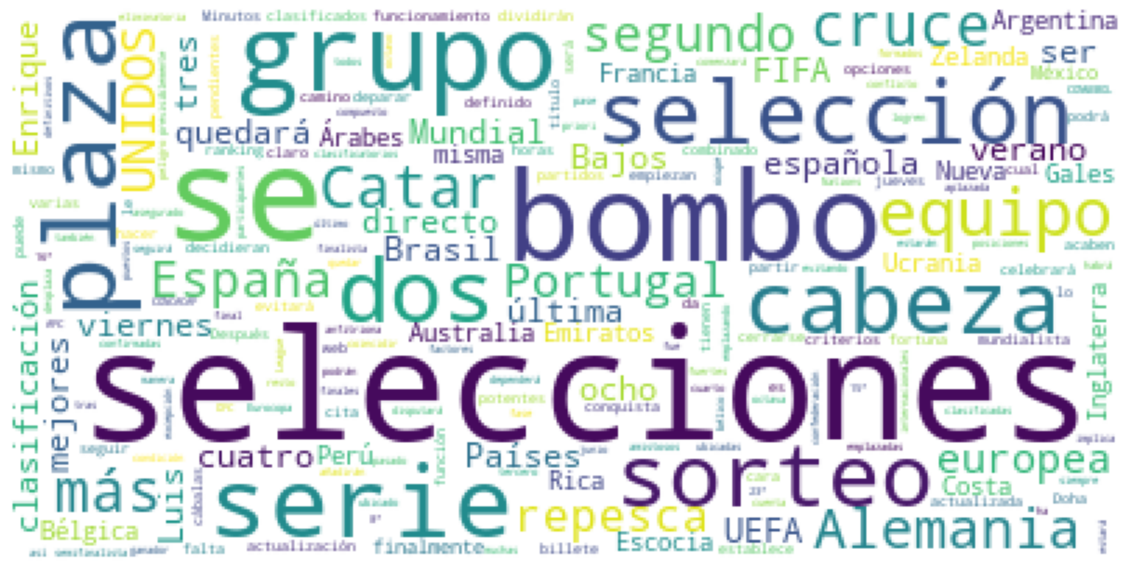

In [76]:
# Para mostrarlo.
plt.subplots(figsize = (20, 20))
plt.imshow(mundial_wc)
plt.axis("off")
plt.show()

- Define una función que eliga al azar **`n`** artículos al azar del fichero **`20minutos_1.csv`** y que muestre para cada articulo:
    - **Titulo, fecha y el WordCloud.**
    
Prueba la función con **`n = 5`**

In [64]:
# Como se han dado problemas para extraer la información, y guardarla en
# un csv, este ejercicio se realizará a partir de la lista de enlaces del
# apartado 1.

In [65]:
# Función que muestra la información requerida en el ejercicio.
def word_clouds():
    
    # Para seleccionar cinco enlaces al azar.
    urls = df["Enlace"].sample(n = 5)
    
    # Para iterar sobre los cinco enlaces.
    for url in urls:
        
        browser = helium.start_chrome(url, headless = True)
        sleep(1)
        soup = BeautifulSoup(browser.page_source, "html.parser")

        # Para el título.
        try:
            titulo = soup.find("h1", class_ = "notice-title").text.strip()
        except:
            titulo = np.nan

        print("Título :", titulo)

        # Para la fecha.
        try:
            fecha = soup.find("span", class_ = "article-date").text.split("-")[0].strip()
        except:
            fecha = np.nan

        print("Fecha :", fecha)

        # Para el wordcloud. Primero el texto.
        try:
            texto_completo = list()

            for bs in soup.find_all("p", class_ = "paragraph"):
                texto_completo.append(bs.text.strip())

            texto_completo = "\n".join(texto_completo)

        except:
            texto_completo = np.nan

        # Luego el objeto y mostrarlo.
        try:
            wc = WordCloud(background_color = "white",
                           max_words = len(texto_completo),
                           stopwords = stopwords)

            wc.generate(texto_completo)

            plt.subplots(figsize = (12, 12))
            plt.imshow(wc)
            plt.axis("off")
            plt.show()

        except:
            wc = np.nan

Título : Y el Óscar es para...
Fecha : 25.03.2022


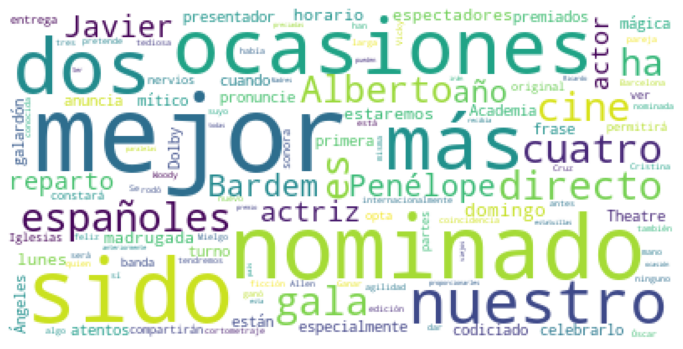

Título : Día Internacional de los Bosques: Iberdrola ha plantado más de 2 millones de árboles desde el 2020 en siete países
Fecha : 21.03.2022


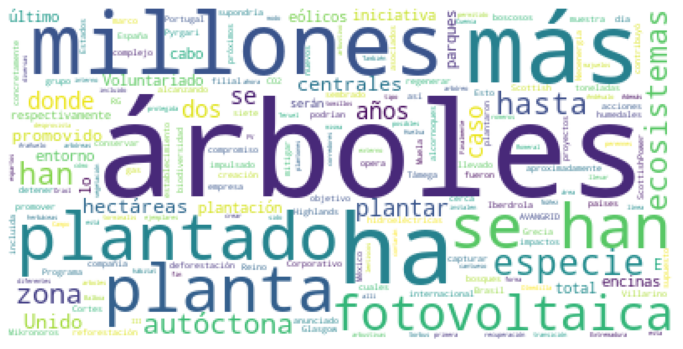

Título : Subidas de tipos de interés: los cambios que se avecinan en tus finanzas personales
Fecha : 29.03.2022


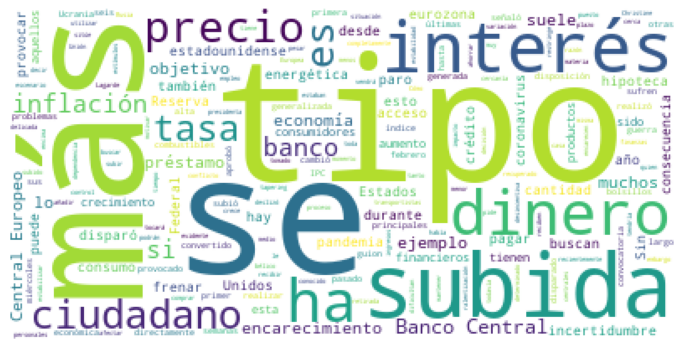

Título : 'Checo' Pérez le arrebata la pole a Leclerc y Sainz en una clasificación marcada por el susto de Schumacher
Fecha : 26.03.2022


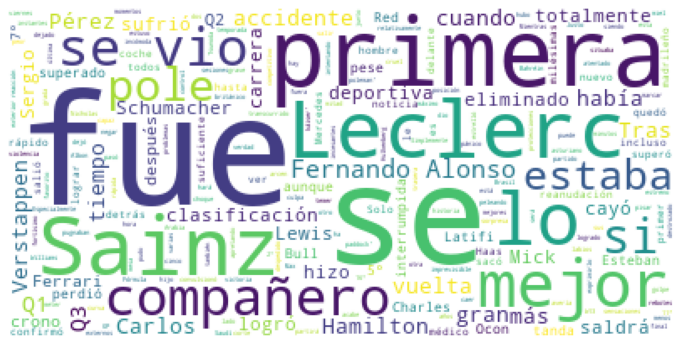

Título : Crean una "nariz electrónica" para evaluar la calidad de la gasolina
Fecha : 28.03.2022


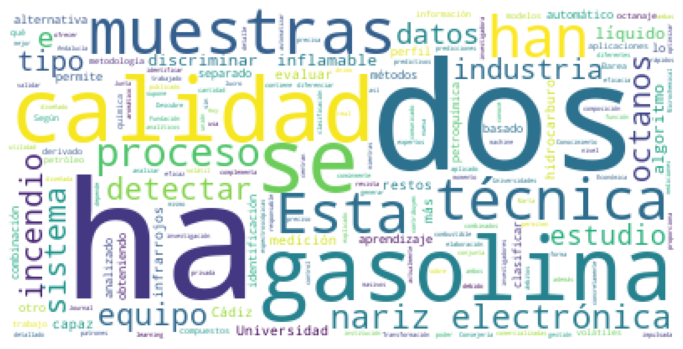

In [66]:
# Para llamar a la función.
word_clouds()